In [80]:
# Import required Libraries

import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [81]:
# reading the datafile
df = pd.read_csv('../Data/Watson_healthcare.csv')
df.head()

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeID                1676 non-null   int64 
 1   Age                       1676 non-null   int64 
 2   Attrition                 1676 non-null   object
 3   BusinessTravel            1676 non-null   object
 4   DailyRate                 1676 non-null   int64 
 5   Department                1676 non-null   object
 6   DistanceFromHome          1676 non-null   int64 
 7   Education                 1676 non-null   int64 
 8   EducationField            1676 non-null   object
 9   EmployeeCount             1676 non-null   int64 
 10  EnvironmentSatisfaction   1676 non-null   int64 
 11  Gender                    1676 non-null   object
 12  HourlyRate                1676 non-null   int64 
 13  JobInvolvement            1676 non-null   int64 
 14  JobLevel                

In [83]:
df.columns

Index(['EmployeeID', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'Shift',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [84]:
df.head()

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [85]:
def features (df):
    columns_to_drop=['EmployeeID','EmployeeCount','Gender','Over18','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StandardHours']
    df.drop(columns=columns_to_drop, inplace=True)
    df['Attrition']= df['Attrition'].replace({'No':0,'Yes':1})
    df['JobRole']= df['JobRole'].replace({'Administrative':'Admin'})
    df['Shift'] = df['Shift'].astype('str')
    df['Education'] = df['Education'].astype('str')
    return df


In [24]:
# import Features1 as fe
# import numpy as np
# fe.features(df)


In [86]:
features (df)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,HourlyRate,...,NumCompaniesWorked,OverTime,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,2,94,...,8,Yes,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Maternity,8,1,Life Sciences,3,61,...,1,No,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Maternity,2,2,Other,4,92,...,6,Yes,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Maternity,3,4,Life Sciences,4,56,...,1,Yes,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Maternity,2,1,Medical,1,40,...,9,No,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,26,1,Travel_Rarely,471,Neurology,24,3,Technical Degree,3,66,...,1,Yes,0,1,3,1,1,0,0,0
1672,46,0,Travel_Rarely,1125,Cardiology,10,3,Marketing,3,94,...,2,Yes,1,15,3,3,3,2,1,2
1673,20,0,Travel_Rarely,959,Maternity,1,3,Life Sciences,4,83,...,1,No,0,1,0,4,1,0,0,0
1674,39,0,Travel_Rarely,466,Neurology,1,1,Life Sciences,4,65,...,1,No,1,21,3,3,21,6,11,8


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1676 non-null   int64 
 1   Attrition                1676 non-null   int64 
 2   BusinessTravel           1676 non-null   object
 3   DailyRate                1676 non-null   int64 
 4   Department               1676 non-null   object
 5   DistanceFromHome         1676 non-null   int64 
 6   Education                1676 non-null   object
 7   EducationField           1676 non-null   object
 8   EnvironmentSatisfaction  1676 non-null   int64 
 9   HourlyRate               1676 non-null   int64 
 10  JobInvolvement           1676 non-null   int64 
 11  JobLevel                 1676 non-null   int64 
 12  JobRole                  1676 non-null   object
 13  JobSatisfaction          1676 non-null   int64 
 14  MaritalStatus            1676 non-null  

In [88]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score

In [89]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'Shift',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [28]:
!pip install imbalanced-learn

In [90]:
#Define the target

X= df.drop('Attrition',axis=1)
y= df['Attrition']

In [91]:
# Select numerical and categorical features
numerical_features = X.select_dtypes(include='number').columns
categorical_features = X.select_dtypes(include='object').columns

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Apply StandardScaler to numerical columns
        ('cat', OneHotEncoder(), categorical_features),
    ]
)

# Fit and transform the data using the preprocessor
transformed_data = preprocessor.fit_transform(X)

# Get the feature names after transformation
numerical_feature_names = list(numerical_features)
categorical_feature_names = list(preprocessor.named_transformers_['cat'].get_feature_names_out())
feature_names = numerical_feature_names + categorical_feature_names

# Convert the transformed data to a DataFrame with column labels
transformed_X = pd.DataFrame(transformed_data, columns=feature_names)

transformed_X.head()


# # Define the column transformer
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), [numerical_features]),  # Apply StandardScaler to numerical columns
#         ('cat', OneHotEncoder(), [categorical_features]),
#     ],
#     remainder='passthrough'
# )

# # Fit and transform the data using the preprocessor
# transformed_data = preprocessor.fit_transform(X)

# # Get the feature names after transformation
# feature_names = preprocessor.get_feature_names_out()

# # Convert the transformed data to a DataFrame with column labels
# transformed_X = pd.DataFrame(transformed_data, columns=feature_names)
# # other_X= df[['BusinessTravel','Education','EducationField','EnvironmentSatisfaction','JobInvolvement','JobRole','MaritalStatus','Shift','OverTime','WorkLifeBalance']]
# # X_scaled= pd.concat([transformed_X, other_X], axis=1)

# # X_scaled.head()
# transformed_X.head()


,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,...,JobRole_Therapist,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,Shift_0,Shift_1,Shift_2,Shift_3
0,0.452933,0.750837,-1.008126,-0.651470,1.412260,0.385287,-0.060036,1.142851,-0.110748,0.727502,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
1,1.329511,-1.299105,-0.149829,0.259935,-0.221278,-1.015454,-0.060036,-0.669276,-0.293315,1.488074,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.014644,1.425849,-0.885512,1.171341,1.313258,-1.015454,-0.958436,0.236787,-0.936423,-1.666173,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3,-0.423644,1.473174,-0.762898,1.171341,-0.468784,0.385287,-0.958436,0.236787,-0.763164,1.243144,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,-1.081078,-0.521970,-0.885512,-1.562875,-1.260803,0.385287,-0.958436,-0.669276,-0.644909,0.328579,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [92]:
transformed_X.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Cardiology', 'Department_Maternity', 'Department_Neurology',
       'Education_1', 'Education_2', 'Education_3', 'Education_4',
       'Education_5', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'JobRole_Admin', 'JobRole_Nurse',
       'JobRole_Other', 'JobRole_Therapist', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'Marital

In [93]:
transformed_X.shape

(1676, 48)

In [94]:
from imblearn.over_sampling import SMOTE

# Assuming you have separate X (features) and y (target) variables
smote = SMOTE()
# X_resampled, y_resampled = smote.fit_resample(transformed_X, y)



In [95]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2, random_state=42, stratify=y)

X_train, y_train = smote.fit_resample(X_train, y_train)

In [96]:
# Modeling
model = LogisticRegression(random_state=11, max_iter = 1000)
model.fit(X_train, y_train)

# Calculate the training accuracy
train_accuracy = model.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Calculate the testing accuracy
test_accuracy = model.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.9343776460626587
Testing Accuracy: 0.8928571428571429


Classification Report (Default Threshold):
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       296
           1       0.54      0.75      0.63        40

    accuracy                           0.89       336
   macro avg       0.75      0.83      0.78       336
weighted avg       0.91      0.89      0.90       336



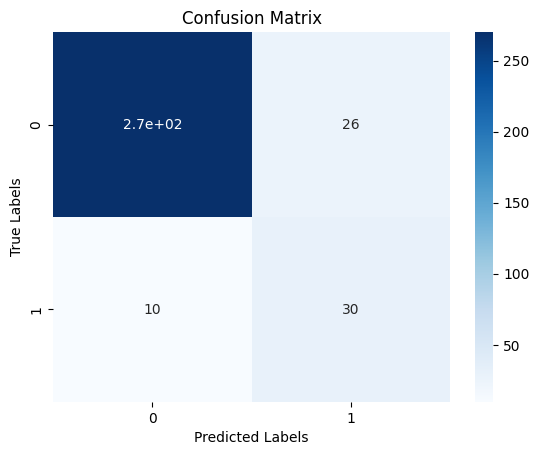

In [97]:
# Make predictions on the testing data
y_pred = model.predict(X_test)
#Classification Report
print("Classification Report (Default Threshold):")
print(classification_report(y_test, y_pred))
# Plot the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()




In [98]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = [
    {'penalty': ['elasticnet', 'l1', 'l2']},
    {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
]

# Create the random forest classifier
model = LogisticRegression(random_state=11, max_iter = 1000)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_

# Calculate the training accuracy of the best model
train_accuracy = best_model.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Calculate the testing accuracy of the best model
test_accuracy = best_model.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)

Best Parameters:  {'penalty': 'l2'}
Best Score:  0.9267664306658083
Training Accuracy: 0.9343776460626587
Testing Accuracy: 0.8928571428571429


c:\Users\asmaa\anaconda3\envs\test_env\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\asmaa\anaconda3\envs\test_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\asmaa\anaconda3\envs\test_env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\asmaa\anaconda3\envs\test_env\lib\site-packages\sklearn\linear_model\_logistic.py

Classification Report (Default Threshold):
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       296
           1       0.54      0.75      0.63        40

    accuracy                           0.89       336
   macro avg       0.75      0.83      0.78       336
weighted avg       0.91      0.89      0.90       336



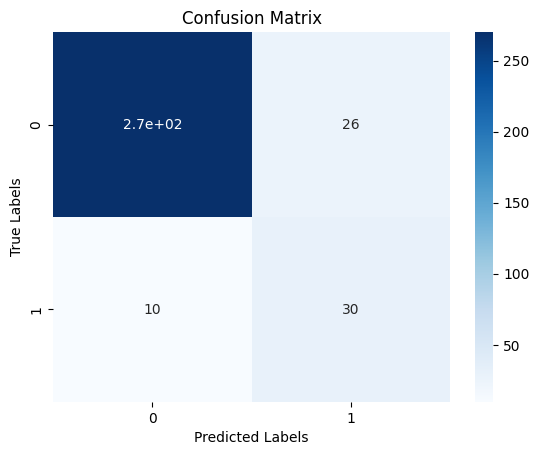

In [99]:
# Make predictions on the testing data
y_pred = best_model.predict(X_test)
#Classification Report
print("Classification Report (Default Threshold):")
print(classification_report(y_test, y_pred))
# Plot the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [100]:
#PCA

Training Accuracy: 0.7984758679085521
Testing Accuracy: 0.7797619047619048
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.80      0.86       296
           1       0.30      0.65      0.41        40

    accuracy                           0.78       336
   macro avg       0.62      0.72      0.64       336
weighted avg       0.87      0.78      0.81       336



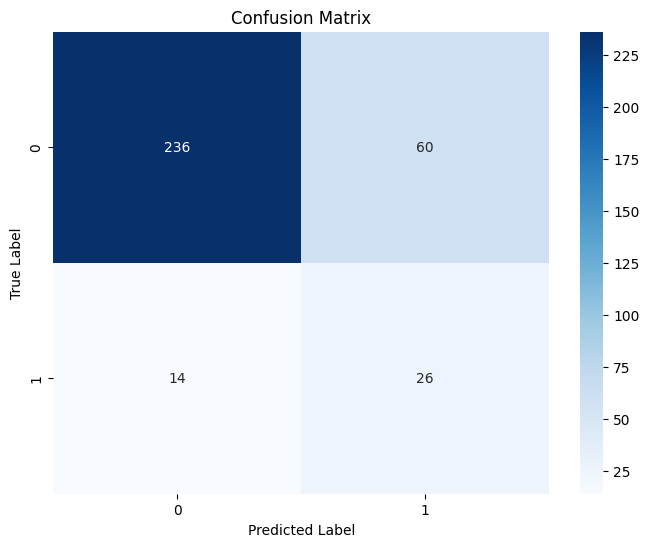

In [101]:

from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define the pipeline
pipeline = Pipeline([
    ('pca', PCA(n_components=10)),  # Apply PCA with 10 components
    ('select', SelectKBest(score_func=f_classif, k=5)),  # Select top 5 features using ANOVA F-value
    ('clf', LogisticRegression())  # Logistic Regression classifier
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = pipeline.predict(X_train)

# Make predictions on the test set
y_test_pred = pipeline.predict(X_test)

# Calculate the accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

# Generate classification report
report = classification_report(y_test, y_test_pred)
print("Classification Report:\n", report)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [102]:
# Calculate the class weights
class_weights = dict(zip(np.unique(y_train), np.bincount(y_train)))

# Modeling
model = SVC(class_weight=class_weights)
model.fit(X_train, y_train)

# Calculate the training accuracy
train_accuracy = model.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Calculate the testing accuracy
test_accuracy = model.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.9983065198983911
Testing Accuracy: 0.9107142857142857


Classification Report (Default Threshold):
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       296
           1       0.65      0.55      0.59        40

    accuracy                           0.91       336
   macro avg       0.79      0.75      0.77       336
weighted avg       0.91      0.91      0.91       336



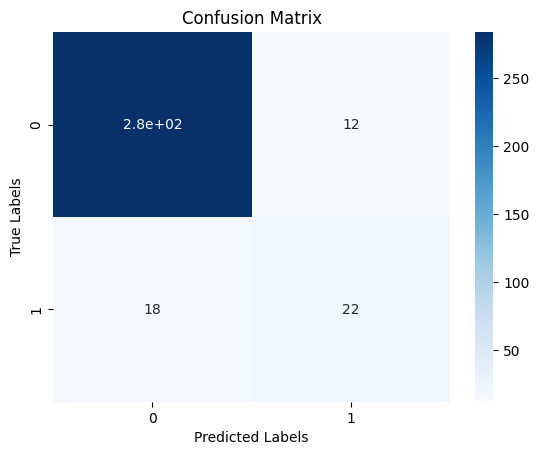

In [103]:
# Make predictions on the testing data
y_pred = model.predict(X_test)
#Classification Report
print("Classification Report (Default Threshold):")
print(classification_report(y_test, y_pred))
# Plot the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [104]:
from sklearn.tree import DecisionTreeClassifier

# Create the decision tree classifier
model= DecisionTreeClassifier(criterion='entropy')
model.fit(X_train, y_train)

# Calculate the training accuracy
train_accuracy = model.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Calculate the testing accuracy
test_accuracy = model.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.9983065198983911
Testing Accuracy: 0.8809523809523809


Classification Report (Default Threshold):
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       296
           1       0.50      0.40      0.44        40

    accuracy                           0.88       336
   macro avg       0.71      0.67      0.69       336
weighted avg       0.87      0.88      0.88       336



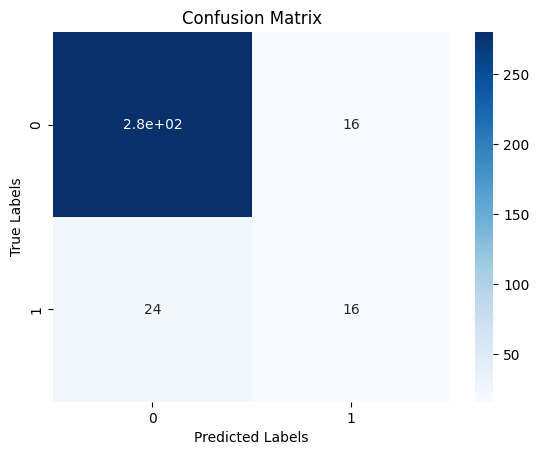

In [105]:
# Make predictions on the testing data
y_pred = model.predict(X_test)
#Classification Report
print("Classification Report (Default Threshold):")
print(classification_report(y_test, y_pred))
# Plot the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [106]:
# Modeling
model = XGBClassifier()
model.fit(X_train, y_train)

# Calculate the training accuracy
train_accuracy = model.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Calculate the testing accuracy
test_accuracy = model.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9983065198983911
Testing Accuracy: 0.9285714285714286


Classification Report (Default Threshold):
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       296
           1       0.77      0.57      0.66        40

    accuracy                           0.93       336
   macro avg       0.86      0.78      0.81       336
weighted avg       0.92      0.93      0.92       336



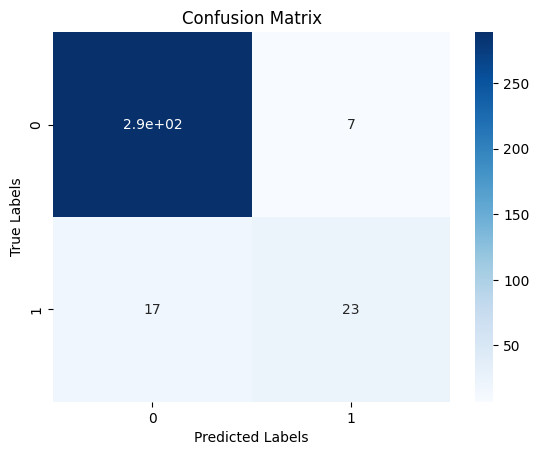

In [107]:
# Make predictions on the testing data
y_pred = model.predict(X_test)
#Classification Report
print("Classification Report (Default Threshold):")
print(classification_report(y_test, y_pred))
# Plot the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [108]:
from sklearn.ensemble import AdaBoostClassifier
# Modeling
model = AdaBoostClassifier()
model.fit(X_train, y_train)

# Calculate the training accuracy
train_accuracy = model.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Calculate the testing accuracy
test_accuracy = model.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9699407281964437
Testing Accuracy: 0.9255952380952381


Classification Report (Default Threshold):
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       296
           1       0.69      0.68      0.68        40

    accuracy                           0.93       336
   macro avg       0.82      0.82      0.82       336
weighted avg       0.92      0.93      0.93       336



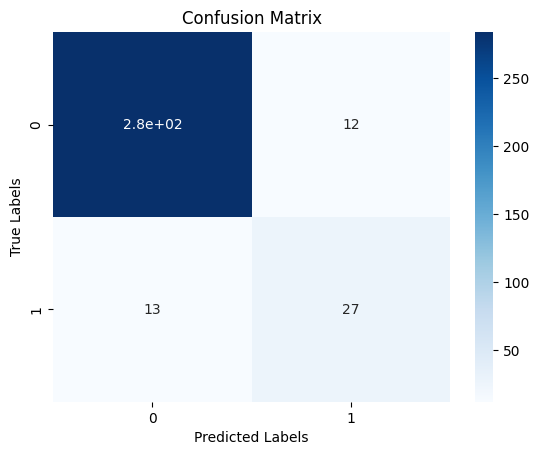

In [109]:
# Make predictions on the testing data
y_pred = model.predict(X_test)
#Classification Report
print("Classification Report (Default Threshold):")
print(classification_report(y_test, y_pred))
# Plot the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

[0.04 0.06 0.08 0.04 0.   0.08 0.06 0.04 0.06 0.02 0.04 0.04 0.02 0.04
 0.   0.02 0.02 0.02 0.   0.02 0.   0.02 0.   0.   0.02 0.   0.02 0.02
 0.   0.   0.   0.   0.06 0.   0.   0.   0.02 0.   0.   0.02 0.   0.02
 0.06 0.02 0.02 0.   0.   0.  ]


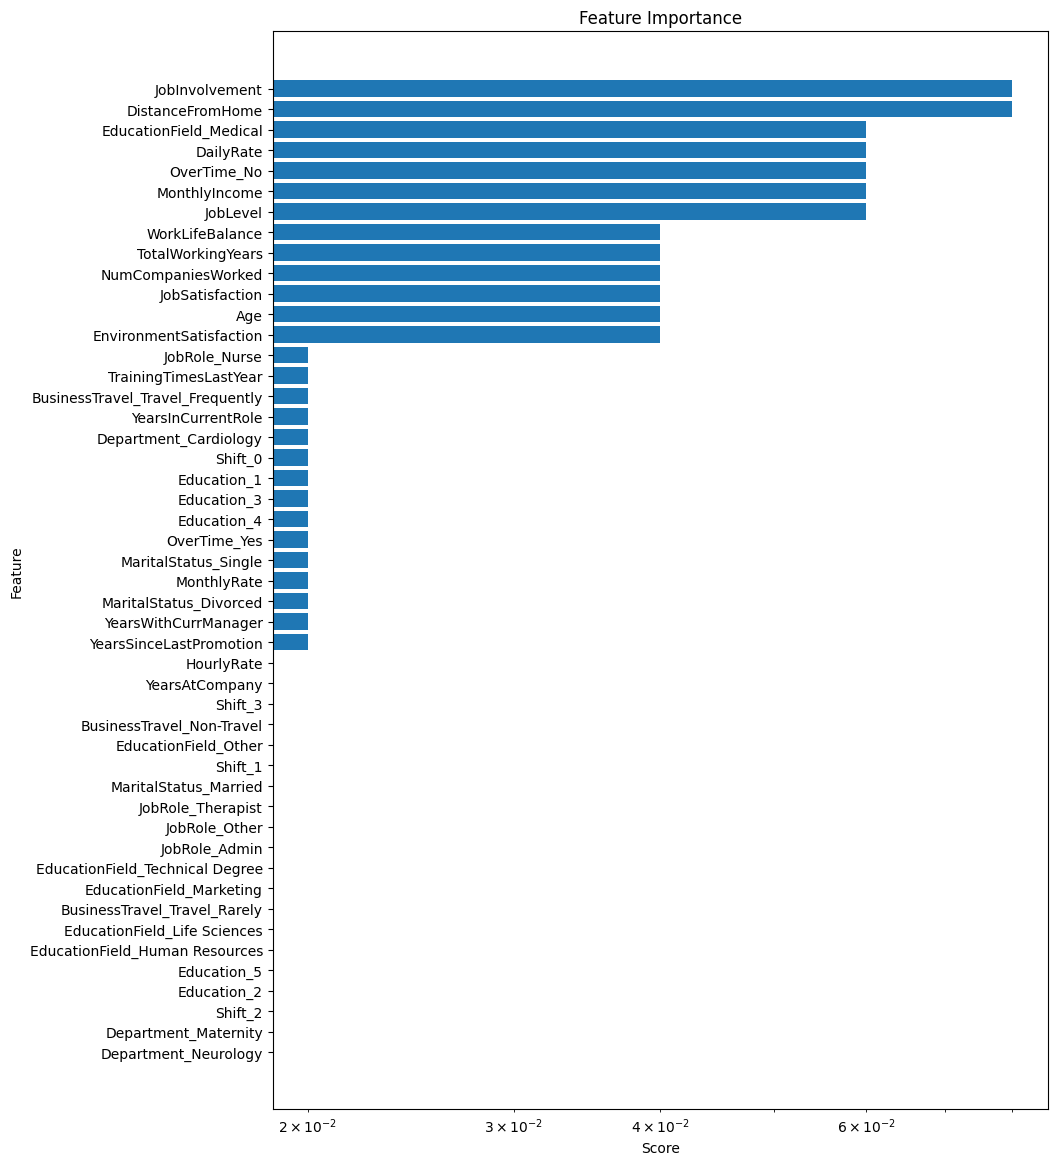

In [110]:
#feature importance score and plot them
feature_importance = model.feature_importances_
print(feature_importance)

# Create a horizontal bar plot to visualize the feature importance scores
plt.figure(figsize=(10, 14))

# Sort the feature importance scores and corresponding feature names
sorted_indices = np.argsort(feature_importance)
sorted_features = X_train.columns[sorted_indices]
sorted_scores = feature_importance[sorted_indices]

plt.barh(sorted_features, sorted_scores)
plt.xlabel('Score')
plt.ylabel('Feature')
plt.title('Feature Importance')

# Change the x-axis scale to logarithmic
plt.xscale('log')
plt.show()

In [111]:
# Random Forest

# Modeling
model = RandomForestClassifier(n_estimators=5)
model.fit(X_train, y_train)

# Calculate the training accuracy
train_accuracy = model.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Calculate the testing accuracy
test_accuracy = model.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9961896697713802
Testing Accuracy: 0.9077380952380952


Classification Report (Default Threshold):
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       296
           1       0.63      0.55      0.59        40

    accuracy                           0.91       336
   macro avg       0.78      0.75      0.77       336
weighted avg       0.90      0.91      0.91       336



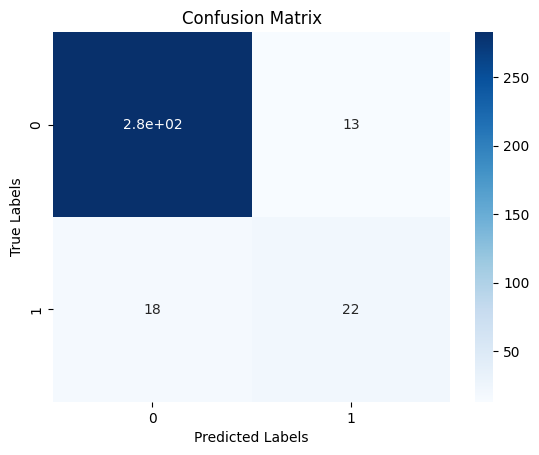

In [112]:
# Make predictions on the testing data
y_pred = model.predict(X_test)
#Classification Report
print("Classification Report (Default Threshold):")
print(classification_report(y_test, y_pred))
# Plot the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

[0.08261023 0.01707106 0.01509715 0.03396572 0.00882406 0.02971098
 0.08538261 0.01035702 0.04521899 0.02393223 0.02054864 0.03567538
 0.011713   0.02783554 0.0298534  0.04255108 0.01061101 0.02591895
 0.00243899 0.01310379 0.02464922 0.01111067 0.00355563 0.00451849
 0.00567544 0.00464704 0.01981913 0.00251592 0.00031806 0.00290169
 0.00729089 0.00148376 0.01526153 0.00783293 0.00391739 0.0005254
 0.00821841 0.00475719 0.00044644 0.02880984 0.00923643 0.01357617
 0.10432276 0.06471633 0.06793063 0.00455805 0.00391358 0.00107117]


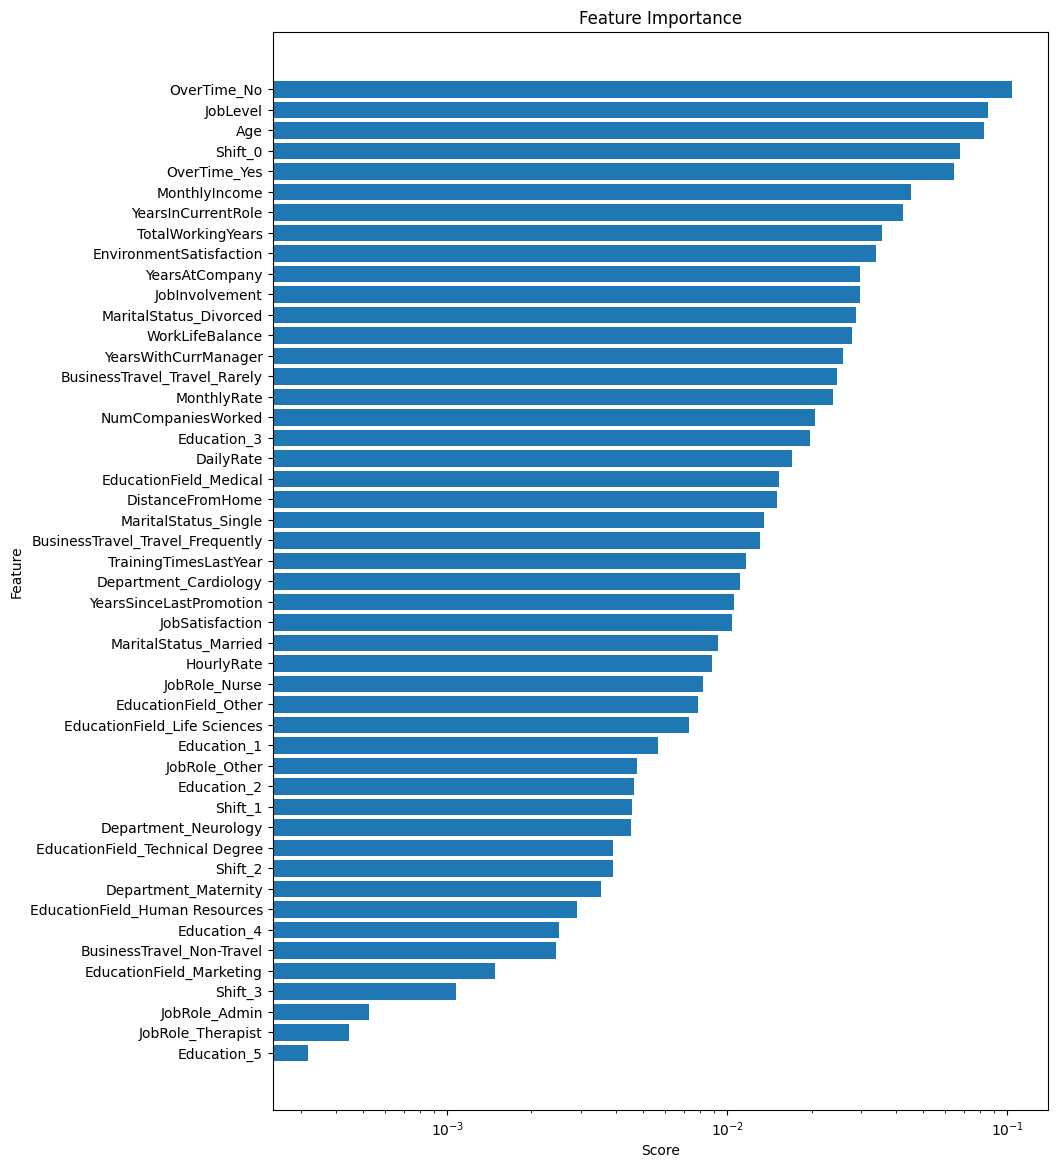

In [114]:
#feature importance score and plot them
feature_importance = model.feature_importances_
print(feature_importance)

# Create a horizontal bar plot to visualize the feature importance scores
plt.figure(figsize=(10, 14))

# Sort the feature importance scores and corresponding feature names
sorted_indices = np.argsort(feature_importance)
sorted_features = X_train.columns[sorted_indices]
sorted_scores = feature_importance[sorted_indices]

plt.barh(sorted_features, sorted_scores)
plt.xlabel('Score')
plt.ylabel('Feature')
plt.title('Feature Importance')

# Change the x-axis scale to logarithmic
plt.xscale('log')
plt.show()

In [115]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# Calculate the training accuracy
train_accuracy = model.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Calculate the testing accuracy
test_accuracy = model.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9898391193903472
Testing Accuracy: 0.9255952380952381


Classification Report (Default Threshold):
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       296
           1       0.73      0.60      0.66        40

    accuracy                           0.93       336
   macro avg       0.84      0.78      0.81       336
weighted avg       0.92      0.93      0.92       336



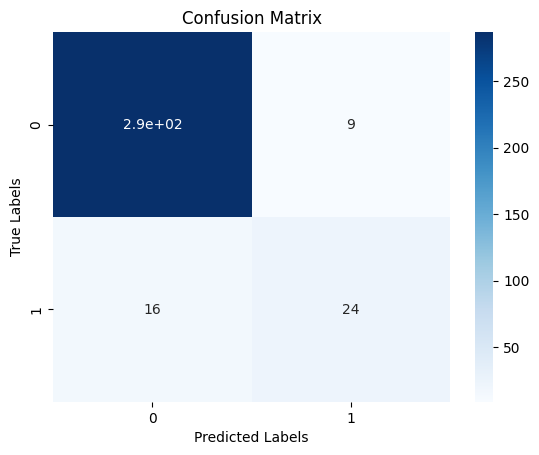

In [116]:
# Make predictions on the testing data
y_pred = model.predict(X_test)
#Classification Report
print("Classification Report (Default Threshold):")
print(classification_report(y_test, y_pred))
# Plot the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

[7.87020235e-02 6.95992392e-03 2.22065715e-02 3.70222712e-02
 4.34074784e-03 4.86718154e-02 9.59945185e-02 9.58137762e-03
 7.91654506e-03 1.34940941e-03 9.07196010e-03 3.96486428e-02
 1.06865061e-02 1.53576909e-02 4.88606437e-02 3.87150391e-03
 8.29571700e-04 2.76283212e-02 1.00653812e-03 5.02865429e-03
 1.47977079e-03 1.31142073e-02 3.11400074e-04 3.39770415e-03
 6.34507061e-04 1.80226657e-03 4.08529536e-03 3.40649611e-03
 5.33131901e-05 6.12077128e-04 2.84339639e-03 1.26600699e-04
 5.52208219e-03 3.35799993e-04 4.34382259e-05 2.16032643e-04
 1.74533058e-03 6.91901658e-05 1.27994306e-03 9.47913803e-04
 5.68300939e-04 2.09218772e-02 2.14317677e-01 1.61826190e-01
 8.14789373e-02 0.00000000e+00 4.04979789e-03 7.52171654e-05]


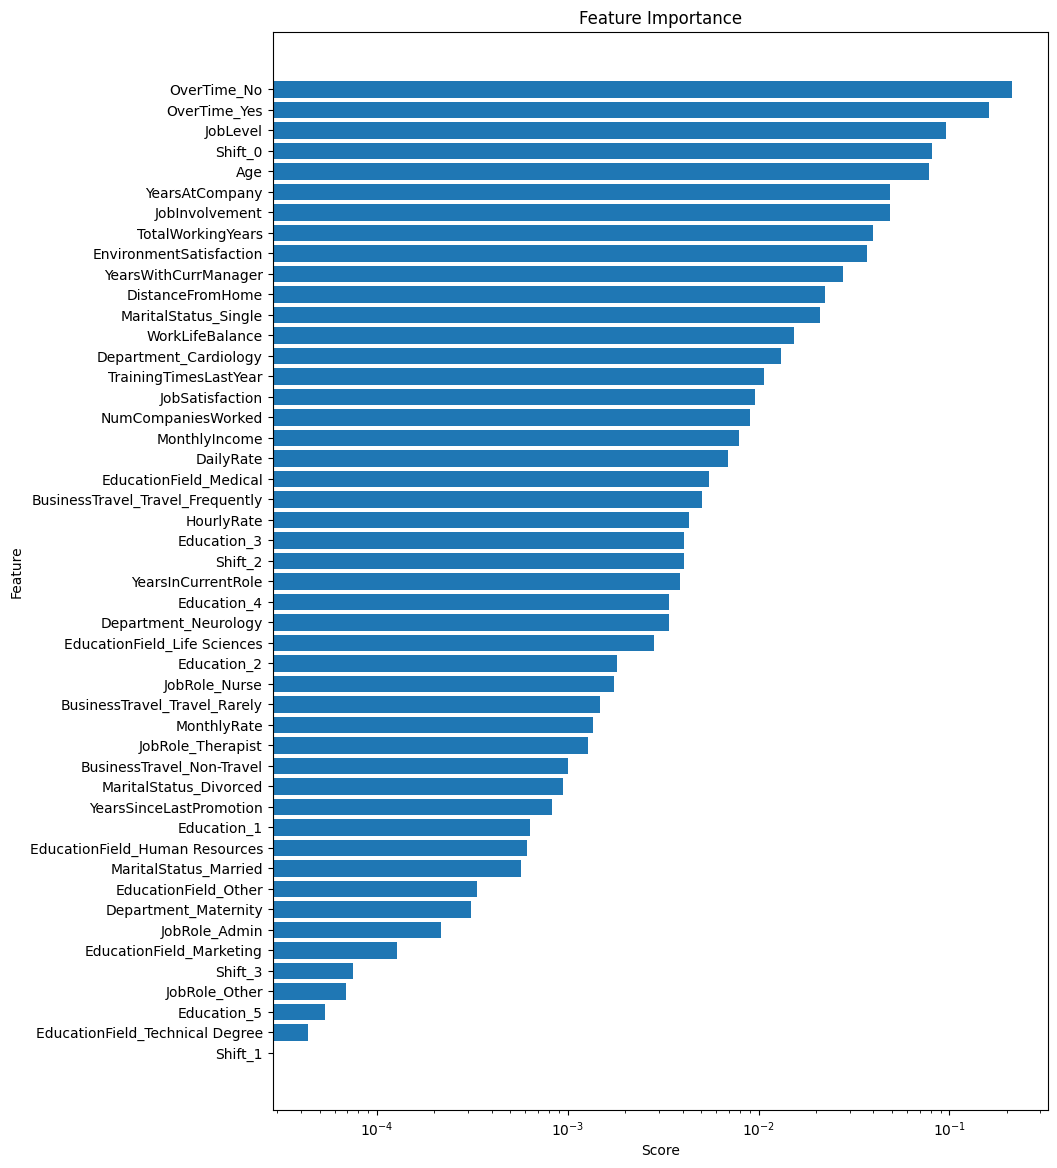

In [117]:
#feature importance score and plot them
feature_importance = model.feature_importances_
print(feature_importance)

# Create a horizontal bar plot to visualize the feature importance scores
plt.figure(figsize=(10, 14))

# Sort the feature importance scores and corresponding feature names
sorted_indices = np.argsort(feature_importance)
sorted_features = X_train.columns[sorted_indices]
sorted_scores = feature_importance[sorted_indices]

plt.barh(sorted_features, sorted_scores)
plt.xlabel('Score')
plt.ylabel('Feature')
plt.title('Feature Importance')

# Change the x-axis scale to logarithmic
plt.xscale('log')
plt.show()

In [105]:
pip install lightgbm

     ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
     ------------- -------------------------- 0.4/1.0 MB 7.4 MB/s eta 0:00:01
     ---------------------------------- ----- 0.9/1.0 MB 9.4 MB/s eta 0:00:01
     ---------------------------------------- 1.0/1.0 MB 9.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [118]:
from lightgbm import LGBMClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2, random_state=42)

model = LGBMClassifier()
model.fit(X_train, y_train)

# Calculate the training accuracy
train_accuracy = model.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Calculate the testing accuracy
test_accuracy = model.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.9977611940298508
Testing Accuracy: 0.9077380952380952


Classification Report (Default Threshold):
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       289
           1       0.83      0.43      0.56        47

    accuracy                           0.91       336
   macro avg       0.87      0.71      0.76       336
weighted avg       0.90      0.91      0.89       336



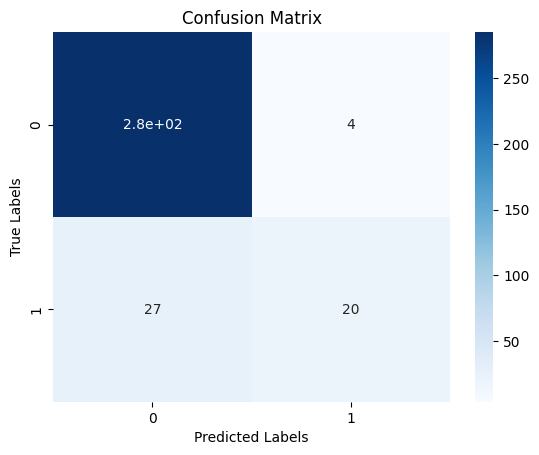

In [119]:
# Make predictions on the testing data
y_pred = model.predict(X_test)
#Classification Report
print("Classification Report (Default Threshold):")
print(classification_report(y_test, y_pred))
# Plot the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()